In [23]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/tweet'

In [35]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_tweet_bertT_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_tweet_bertT_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/BERT/Bert_SST/Bert_linear_tweet/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1000,)

In [36]:
np.load("X_train.npy").shape

(18000, 300)

In [39]:
app_k_nonon = [app_k[i] for i in range(len(app_k)) if app_k[i] != None]
len(app_k_nonon)

904

In [41]:
np.mean([i for i in app_k_nonon if i != None])

568.7024336283185

# can find smallest k

In [42]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

571

In [30]:
np.mean(app_k_nonon)

568.7024336283185

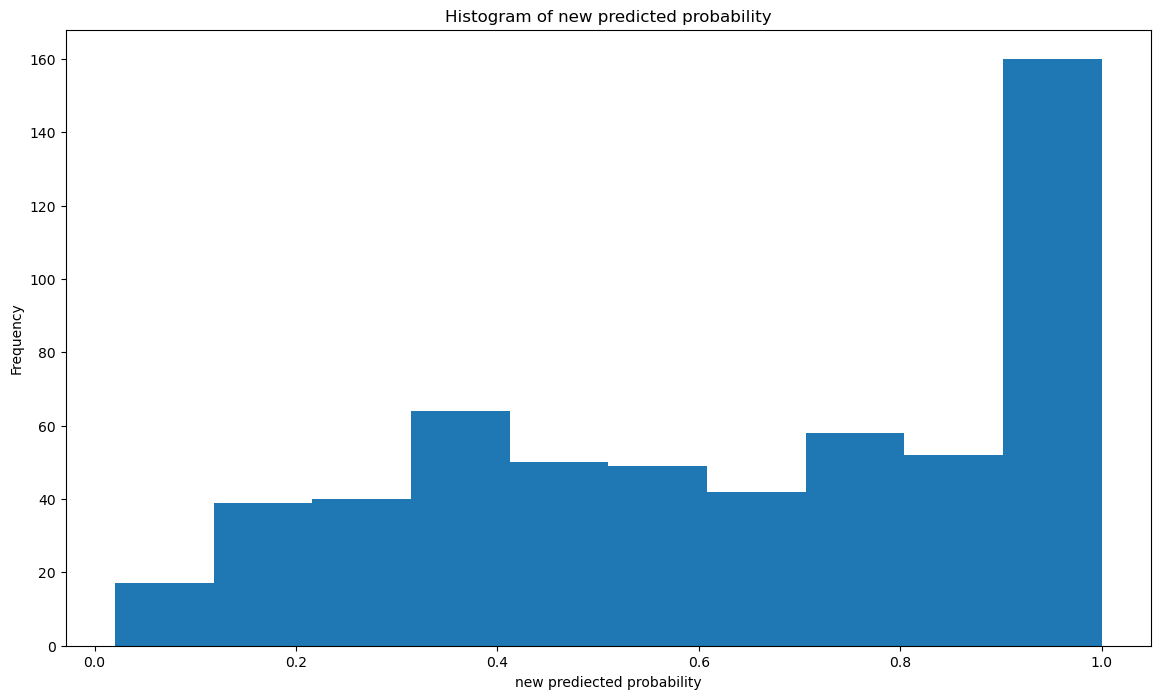

In [31]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

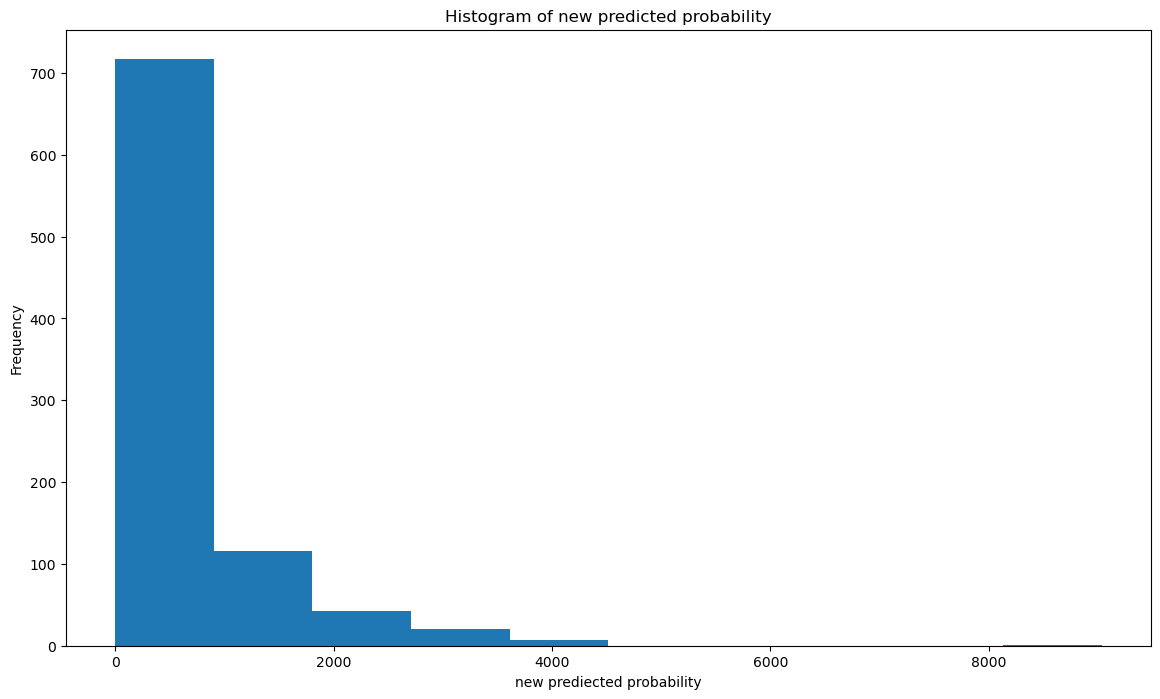

In [32]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [33]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1298):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.02563945803491919
new 0.9975406614190568
appro k 2523
flip label [1.]

i 1
old 0.4755773907127433
new 0.5150614427723936
appro k 75
flip label [1.]

i 2
old 0.17778629695049544
new 0.6712397171864845
appro k 370
flip label [1.]

i 3
old 0.794531673563315
new 0.44707207413673505
appro k 457
flip label [1.]

i 4
old 0.7348253076586468
new 0.4890253020806838
appro k 399
flip label [1.]

i 5
old 0.741114895698204
new 0.4963559295544928
appro k 270
flip label [1.]

i 6
old 0.7399311623592152
new 0.44288442813228074
appro k 313
flip label [1.]

i 7
old 0.5339863471954538
new 0.49489206998520874
appro k 5
flip label [1.]

i 8
old 0.23497711663546614
new 0.4852013626029436
appro k 98
flip label [0.]

i 9
old 0.6942735610632775
new 0.5003468696182242
appro k 35
flip label [0.]

i 10
old 0.17971565943984139
new 0.6378127565401724
appro k 776
flip label [1.]

i 11
old 0.48226648395029476
new 0.4764853637809571
appro k 25
flip label [0.]

i 12
old 0.46120510827038985
new 0.49599156487820

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [34]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

676

In [ ]:
app_k.shape

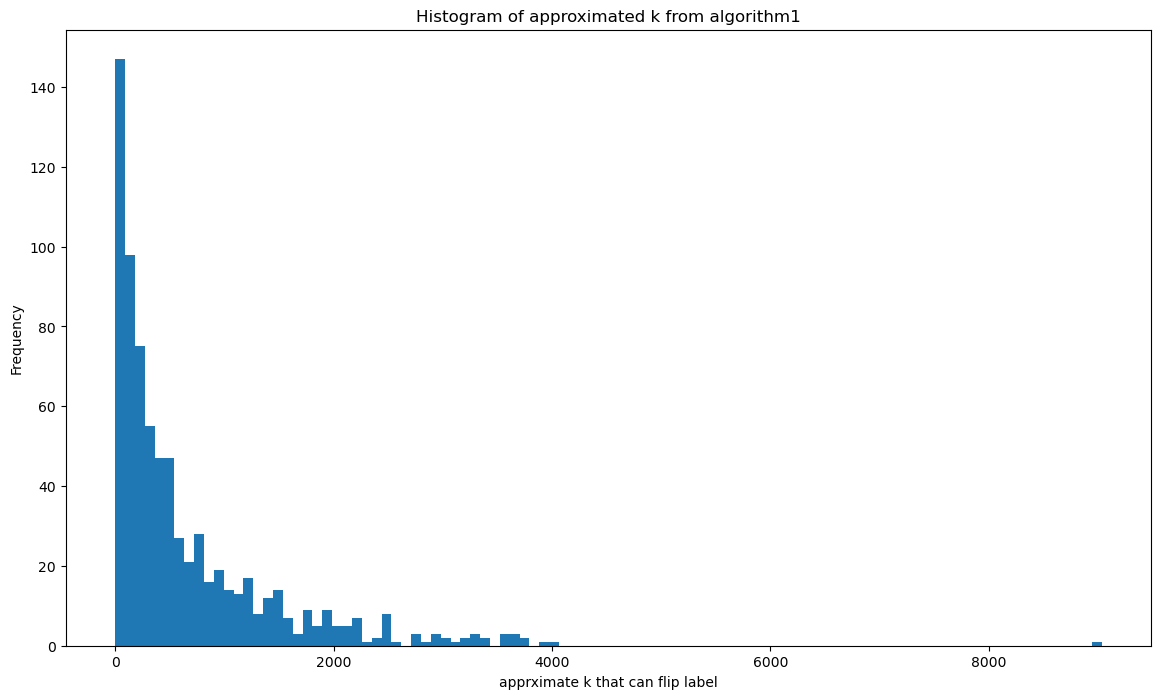

In [9]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

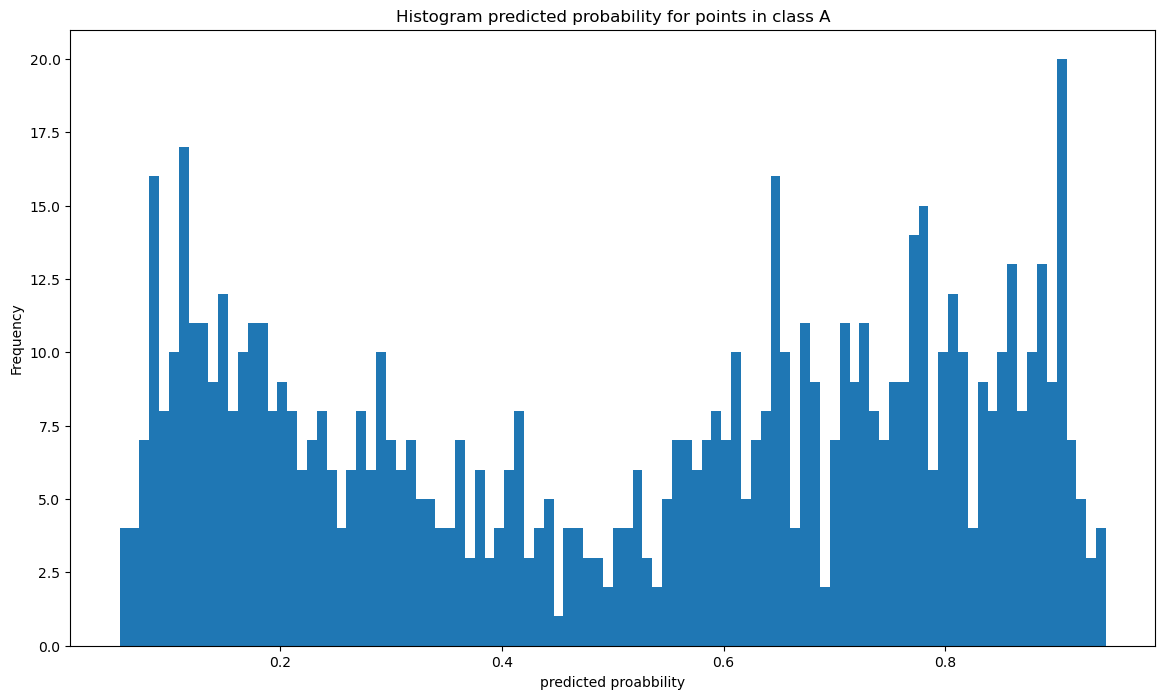

In [10]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [11]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

156

In [12]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.21799582307459964, 0.028943240879455694)

In [13]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.04435991288959612, 0.0015243265993027404)